### Logistic Regression Project: Online Shoppers Purchasing Intention with Python

In [1]:
import pandas as pd

# Veriyi yükle
df = pd.read_csv("online_shoppers_intention.csv")
# https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

# İlk 5 satıra göz at
print("🔎 İlk 5 satır:")
print(df.head())

🔎 İlk 5 satır:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0      

In [2]:
# Veri kümesinin genel bilgisi
print("\n📋 Veri kümesi bilgisi:")
print(df.info())


📋 Veri kümesi bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14

In [3]:
# Eksik veri var mı?
print("\n🧹 Eksik veri kontrolü:")
print(df.isnull().sum()) #Her bir sütunda eksik veri olup olmadığını gösterir.


🧹 Eksik veri kontrolü:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [4]:
# Veri çerçevesinin temel istatistiklerine göz atalım
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

#### 1. Kategorik Verilerin Dönüştürülmesi
Month, VisitorType, ve Weekend sütunları makine öğrenmesi algoritmaları için sayısal hale getirilmeli (örn. OneHotEncoding veya LabelEncoding).

In [5]:
# One-Hot Encoding uygulanacak sütunlar
df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)

# 'Weekend' ve 'Revenue' sütunlarını int'e çevir
df['Weekend'] = df['Weekend'].astype(int) #astype(int): Bu fonksiyon, sütundaki tüm verileri integer türüne dönüştürür.
df['Revenue'] = df['Revenue'].astype(int)

print("✅ Kategorik veriler sayısallaştırıldı!")
print("🧾 Yeni sütunlar:", df.columns.tolist())

✅ Kategorik veriler sayısallaştırıldı!
🧾 Yeni sütunlar: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


**pd.get_dummies():** Bu fonksiyon, kategorik sütunları sayısal verilere dönüştürür. drop_first=True parametresi, ilk sütununun çıkarılmasını sağlar. Bu, multicollinearity (çoklu doğrusal ilişki) riskini azaltır.

#### Veri Özelliklerinin ve Hedef Değişkenin Ayrılması:
Şimdi, verimizin özelliklerini (bağımsız değişkenler) ve hedef değişkenini (bağımlı değişken) ayıralım.

X: Özellikler (bağımsız değişkenler). Burada tüm sütunları kullanacağız, ama Revenue hedef değişken olduğu için bunu dışarıda bırakacağız.

y: Hedef değişken (bağımlı değişken). Bu durumda Revenue sütununu hedef değişken olarak alacağız.

In [6]:
# Özellikleri ve hedef değişkeni ayıralım
X = df.drop('Revenue', axis=1)  # 'Revenue' sütununu çıkarıyoruz
y = df['Revenue']  # 'Revenue' hedef değişken

### Veriyi Eğitim ve Test Olarak Ayırma:

In [7]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## veri ölçeklendirme

In [8]:
from sklearn.preprocessing import StandardScaler

# Standartlaştırıcıyı oluşturuyoruz
scaler = StandardScaler()

# Eğitim verisini standartlaştırıyoruz
X_train_scaled = scaler.fit_transform(X_train)

# Test verisini standartlaştırıyoruz (fit kullanmadan, sadece transform)
X_test_scaled = scaler.transform(X_test)

#### Lojistik Regresyon Modelini Eğitmek:

In [9]:
from sklearn.linear_model import LogisticRegression

# Lojistik regresyon modelini tanımlıyoruz
model = LogisticRegression(max_iter=1000)

# Modeli eğitim verisiyle eğitiyoruz
model.fit(X_train_scaled, y_train)

print("✅ Model eğitildi!")


✅ Model eğitildi!


### Modelin Test Verisi Üzerindeki Doğruluğu:

In [11]:
from sklearn.metrics import accuracy_score

# Test verisi üzerinde tahminler yapalım
y_pred = model.predict(X_test_scaled)

# Doğruluk oranını hesaplayalım
accuracy = accuracy_score(y_test, y_pred) #Gerçek test etiketleri ile tahmin edilen etiketleri karşılaştırarak doğruluk oranını hesaplıyoruz.

print(f"✅ Modelin doğruluğu: {accuracy:.4f}")

✅ Modelin doğruluğu: 0.8731


### Karışıklık Matrisi (Confusion Matrix):
Karışıklık matrisi, modelin doğru ve yanlış sınıflandırmalarını gösteren bir tablodur. Bu matrisi görmek, modelin hangi sınıflarda hata yaptığını anlamamıza yardımcı olabilir.

In [12]:
from sklearn.metrics import confusion_matrix

# Karışıklık matrisini hesaplayalım
cm = confusion_matrix(y_test, y_pred)
# confusion_matrix(y_test, y_pred): Test verisi ve modelin tahminleri arasındaki karışıklığı gösterir.
print("✅ Karışıklık Matrisi:")
print(cm)

✅ Karışıklık Matrisi:
[[2008   47]
 [ 266  145]]


### Precision, Recall ve F1 Skoru:

Bu metrikler, özellikle dengesiz sınıf dağılımlarında modelin gerçek performansını daha iyi anlamamıza yardımcı olur.

* **Precision:** Pozitif tahminlerimizin ne kadarının doğru olduğunu gösterir.
* **Recall:** Gerçek pozitif sınıfların ne kadarını doğru tahmin ettiğimizi gösterir.
* **F1 Skoru:** Precision ve recall'un harmonik ortalamasıdır, her ikisini dengeleyerek modelin genel başarısını ölçer.

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall ve F1 Skorunu hesaplayalım
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Skoru: {f1:.4f}")

✅ Precision: 0.7552
✅ Recall: 0.3528
✅ F1 Skoru: 0.4809


### ROC ve AUC:

Receiver Operating Characteristic (ROC) eğrisi ve AUC (Area Under Curve), modelin doğruluk oranının ötesinde performansını gösteren önemli metriklerdir.


* **roc_curve():** ROC eğrisini çizerken kullanılan değerleri döndürür.
* **model.predict_proba():** Modelin her bir örnek için her sınıfın olasılıklarını tahmin etmesine olanak tanır. **[:, 1]** ifadesi, pozitif sınıfın olasılıklarını alır.
* **auc():** AUC değerini hesaplar.

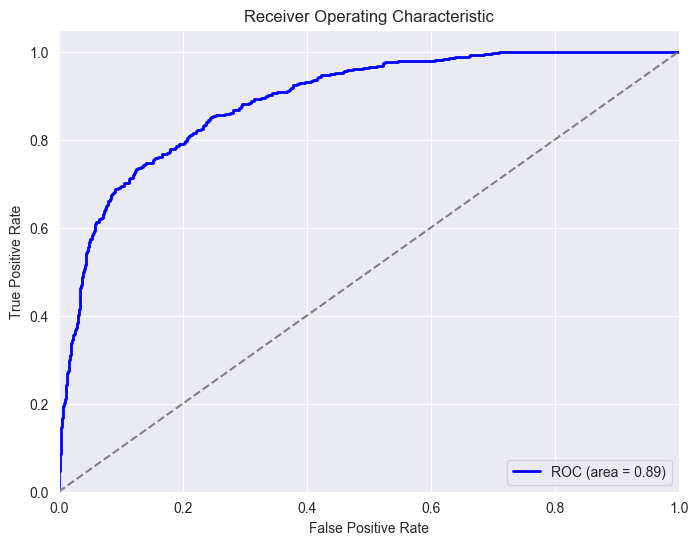

✅ AUC: 0.8902


In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC eğrisini çizmek için gerekli değerleri alalım
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizelim
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"✅ AUC: {roc_auc:.4f}")

In [15]:
import joblib

# Modeli kaydedelim
joblib.dump(model, 'logistic_regression_model.pkl')

print("✅ Model kaydedildi!")

✅ Model kaydedildi!
